In [1]:
%reload_ext nb_black
from matplotlib import pyplot as plt
import plotly
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.multitest import multipletests

%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats

from tqdm.notebook import tqdm as status

<IPython.core.display.Javascript object>

In [2]:
# import dataset and dictionary for the data
df = pd.read_csv("data/train_data.csv")
df_dict = pd.read_csv("data/train_data_dictionary.csv")
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


<IPython.core.display.Javascript object>

In [3]:
#  save the df with only the fields of interest
df = df[
    [
        "case_id",
        "Bed Grade",
        "patientid",
        "Type of Admission",
        "Severity of Illness",
        "Visitors with Patient",
        "Age",
        "Admission_Deposit",
        "Stay",
    ]
]

# set index to case_id
df = df.set_index("case_id", inplace=False)

# rename columns so they're easier to work with
df = df.rename(
    columns={
        "Bed Grade": "bed_grade",
        "Type of Admission": "admission_type",
        "Severity of Illness": "severity",
        "Visitors with Patient": "visitors",
        "Age": "age",
        "Admission_Deposit": "deposit",
        "Stay": "stay",
    },
    inplace=False,
)

df.head()

,bed_grade,patientid,admission_type,severity,visitors,age,deposit,stay
case_id,,,,,,,,
1,2.0,31397,Emergency,Extreme,2,51-60,4911.0,0-10
2,2.0,31397,Trauma,Extreme,2,51-60,5954.0,41-50
3,2.0,31397,Trauma,Extreme,2,51-60,4745.0,31-40
4,2.0,31397,Trauma,Extreme,2,51-60,7272.0,41-50
5,2.0,31397,Trauma,Extreme,2,51-60,5558.0,41-50


<IPython.core.display.Javascript object>

In [4]:
# set all stay values of "More than 100 Days" to 100 numeric
# over_100 = df.stay == "More than 100 Days"
df.loc[df.stay == "More than 100 Days", "stay"] = 100
# df[df.stay == 100]


# stay column converted to number value
stay_slice = (pd.to_numeric(df.stay.str.slice(0, 1)) * 10) + 5
df.stay = stay_slice

# age column converted to number value
age_slice = (pd.to_numeric(df.age.str.slice(0, 1)) * 10) + 5
df.age = age_slice

df.head()

,bed_grade,patientid,admission_type,severity,visitors,age,deposit,stay
case_id,,,,,,,,
1,2.0,31397,Emergency,Extreme,2,55,4911.0,5.0
2,2.0,31397,Trauma,Extreme,2,55,5954.0,45.0
3,2.0,31397,Trauma,Extreme,2,55,4745.0,35.0
4,2.0,31397,Trauma,Extreme,2,55,7272.0,45.0
5,2.0,31397,Trauma,Extreme,2,55,5558.0,45.0


<IPython.core.display.Javascript object>

In [5]:
df = df.fillna(100, inplace=False)

<IPython.core.display.Javascript object>

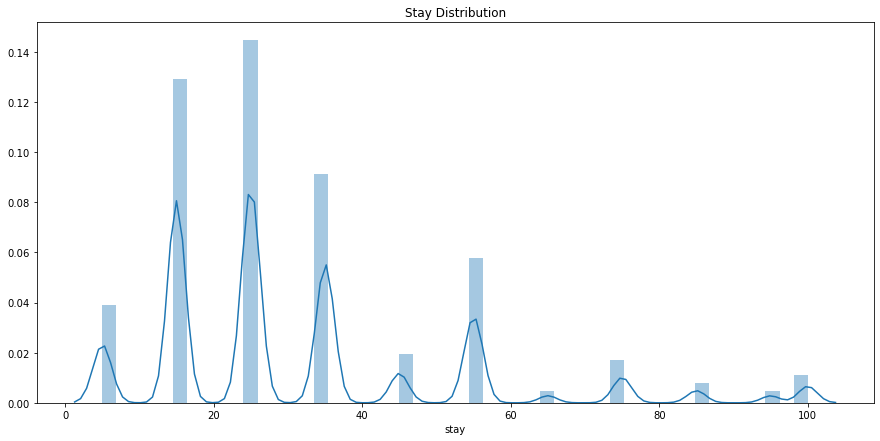

<IPython.core.display.Javascript object>

In [6]:
plt.figure(figsize=[15, 7])
plt.title("Stay Distribution")
sns.distplot(df.stay)
plt.show()

In [7]:
df.age.unique()

array([55, 75, 35, 45, 85, 65, 25, 15,  5, 95], dtype=int64)

<IPython.core.display.Javascript object>

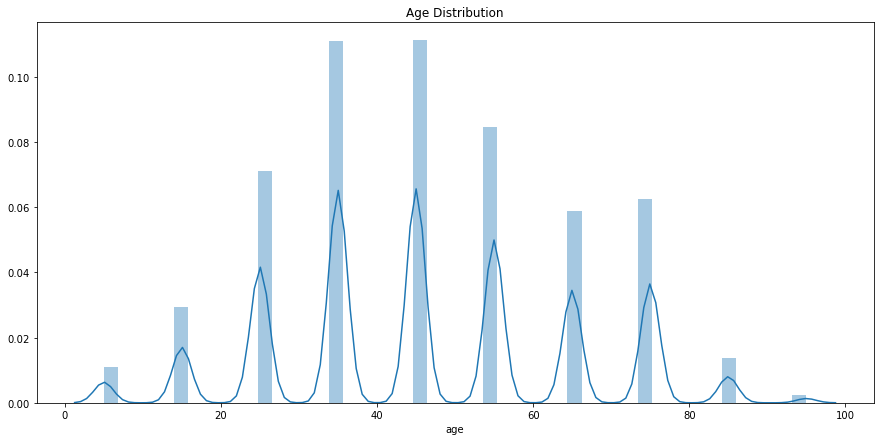

<IPython.core.display.Javascript object>

In [8]:
plt.figure(figsize=[15, 7])
plt.title("Age Distribution")
# plt.axvline(df.age.mean(), color="r")
sns.distplot(df.age)
plt.show()

In [9]:
df.severity.value_counts()

Moderate    175843
Minor        85872
Extreme      56723
Name: severity, dtype: int64

<IPython.core.display.Javascript object>

In [10]:
df.admission_type.value_counts()

Trauma       152261
Emergency    117676
Urgent        48501
Name: admission_type, dtype: int64

<IPython.core.display.Javascript object>

In [11]:
admission_type = df.groupby("admission_type").count()
severity = df.groupby("severity").count()
bed_grade = df.groupby("bed_grade").count()

<IPython.core.display.Javascript object>

In [12]:
admission_type = pd.DataFrame(admission_type)
severity = pd.DataFrame(severity)
bed_grade = pd.DataFrame(bed_grade)

<IPython.core.display.Javascript object>

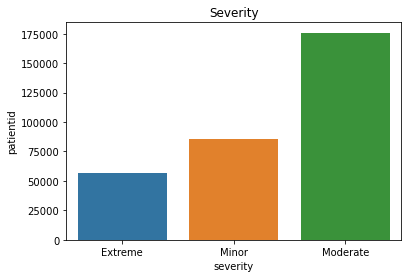

<IPython.core.display.Javascript object>

In [13]:
plt.title("Severity")
sns.barplot(x=severity.index, y=severity.patientid)

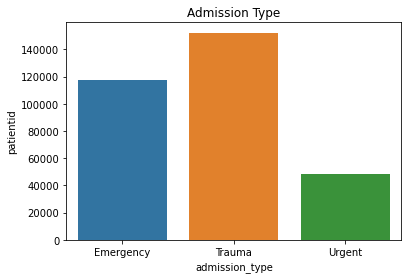

<IPython.core.display.Javascript object>

In [14]:
plt.title("Admission Type")
sns.barplot(x=admission_type.index, y=admission_type.patientid)

In [15]:
bed_grade = bed_grade.drop(100.0)

<IPython.core.display.Javascript object>

In [16]:
bed_grade["percetage"] = (bed_grade.patientid / bed_grade.patientid.sum()) * 100
bed_grade

,patientid,admission_type,severity,visitors,age,deposit,stay,percetage
bed_grade,,,,,,,,
1.0,26505,26505,26505,26505,26505,26505,26505,8.326396
2.0,123671,123671,123671,123671,123671,123671,123671,38.850546
3.0,110583,110583,110583,110583,110583,110583,110583,34.739025
4.0,57566,57566,57566,57566,57566,57566,57566,18.084034


<IPython.core.display.Javascript object>

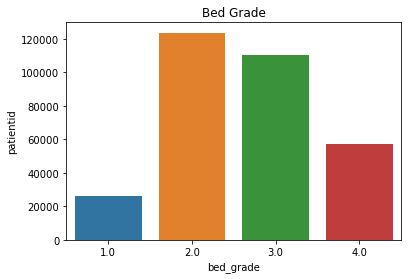

<IPython.core.display.Javascript object>

In [17]:
plt.title("Bed Grade")
sns.barplot(x=bed_grade.index, y=bed_grade.patientid)